In [1]:
%matplotlib inline

## [Probability Calibration](https://scikit-learn.org/stable/modules/calibration.html)
- Classification: you want to predict class labels AND their probability of being correct.
- Well calibrated classifiers have a ```predict_proba``` method for this.

## Example: Comparison of Classifier Predictability
- X axis = average predicted probability in each bin
- Y axis = *fraction of positives* (% of samples whose class is positive)

In [3]:
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn              import datasets
from sklearn.naive_bayes  import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble     import RandomForestClassifier
from sklearn.svm          import LinearSVC
from sklearn.calibration  import calibration_curve

X, y = datasets.make_classification(n_samples=100000, n_features=20,
                                    n_informative=2, n_redundant=2)

train_samples = 100
X_train       = X[:train_samples]
X_test        = X[train_samples:]
y_train       = y[:train_samples]
y_test        = y[train_samples:]

lr            = LogisticRegression()
gnb           = GaussianNB()
svc           = LinearSVC(C=1.0)
rfc           = RandomForestClassifier()

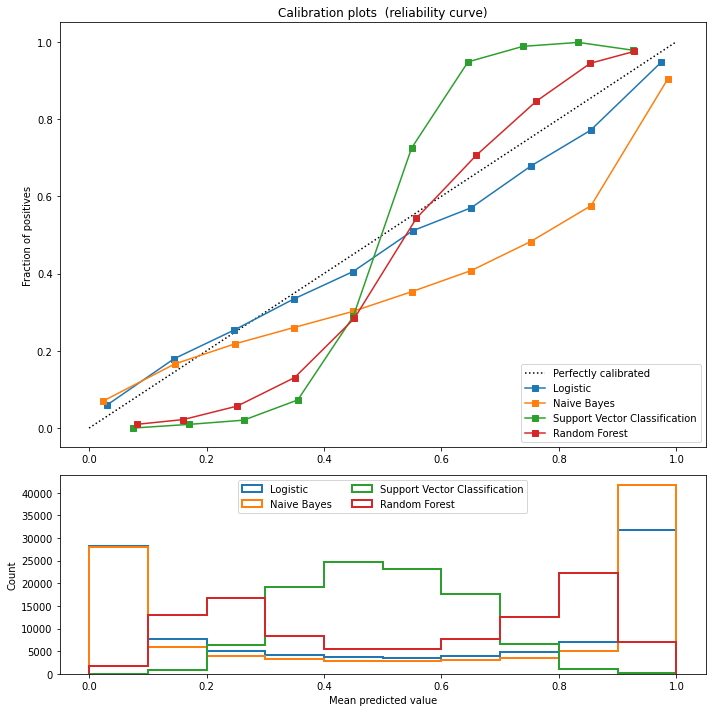

In [4]:

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(lr, 'Logistic'),
                  (gnb, 'Naive Bayes'),
                  (svc, 'Support Vector Classification'),
                  (rfc, 'Random Forest')]:
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()